##1-Install packages

In [51]:
import yfinance as yf
import pandas as pd

tickers = ['BTC-USD', 'GC=F', 'ETH-USD']
data = yf.download(tickers, start="2020-01-01", end="2024-01-01")['Adj Close']
data.head()

[*********************100%***********************]  3 of 3 completed


Ticker,BTC-USD,ETH-USD,GC=F
Date,,,
2020-01-01 00:00:00+00:00,7200.174316,130.802002,NaN
2020-01-02 00:00:00+00:00,6985.470215,127.410179,1524.500000
2020-01-03 00:00:00+00:00,7344.884277,134.171707,1549.199951
2020-01-04 00:00:00+00:00,7410.656738,135.069366,NaN
2020-01-05 00:00:00+00:00,7411.317383,136.276779,NaN


##2-Data preparation

In [7]:
print(data.isnull().sum())
data = data.interpolate(method='linear')

Ticker
BTC-USD      0
ETH-USD      0
GC=F       522
dtype: int64


##3- plot the data and visually see how it behaves

---



In [8]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

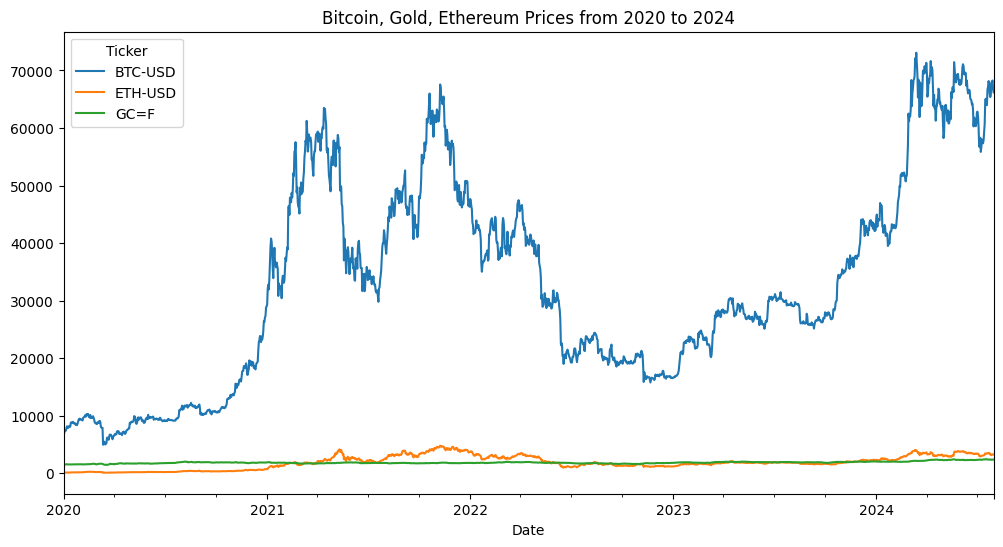

In [9]:
import matplotlib.pyplot as plt

data.plot(figsize=(12, 6))
plt.title('Bitcoin, Gold, Ethereum Prices from 2020 to 2024')
plt.show()

Calculate the correlation coefficient to see the relationship between asset prices

Ticker    BTC-USD   ETH-USD      GC=F
Ticker                               
BTC-USD  1.000000  0.899745  0.580133
ETH-USD  0.899745  1.000000  0.466951
GC=F     0.580133  0.466951  1.000000


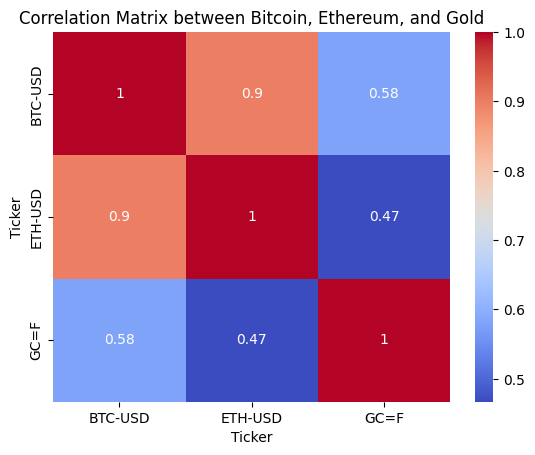

In [10]:
# Calculate the correlation coefficient to see the relationship between asset prices
correlation_matrix = data.corr()

print(correlation_matrix)
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Bitcoin, Ethereum, and Gold')
plt.show()

##4-Time series preliminary analysis

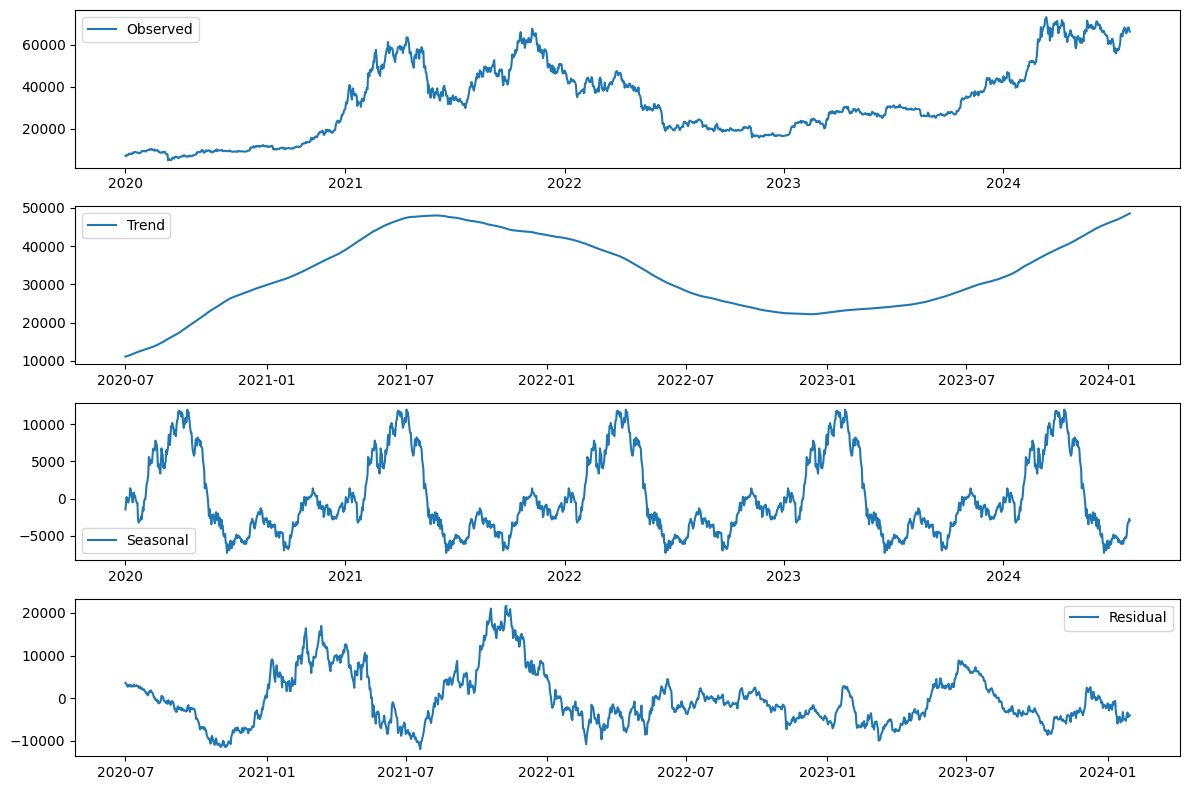

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['BTC-USD'], model='additive', period=365)
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

##5-Test For Stationarity

In [13]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
# Define a function to perform ADF testing
def adf_test(series, name):
    # drop infinite values
    series = series.replace([np.inf, -np.inf], np.nan).dropna()
    result = adfuller(series)
    print(f'Augmented Dickey-Fuller Test for {name}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    if result[1] < 0.05:
        print(f'{name} is stationary')
    else:
        print(f'{name} is non-stationary')
    print('')

# Testing the stability of Bitcoin, Ethereum and gold
adf_test(data['BTC-USD'], 'Bitcoin')
adf_test(data['ETH-USD'], 'Ethereum')
adf_test(data['GC=F'], 'Gold')

Augmented Dickey-Fuller Test for Bitcoin:
ADF Statistic: -1.0773287946646513
p-value: 0.7240277318812155
Critical Values: {'1%': -3.4342694338297464, '5%': -2.863271207750943, '10%': -2.567691652321558}
Bitcoin is non-stationary

Augmented Dickey-Fuller Test for Ethereum:
ADF Statistic: -1.8277374240707398
p-value: 0.3667803579165897
Critical Values: {'1%': -3.4342812150354276, '5%': -2.8632764080687307, '10%': -2.5676944214132233}
Ethereum is non-stationary

Augmented Dickey-Fuller Test for Gold:
ADF Statistic: -0.9992288805690358
p-value: 0.7535454453755556
Critical Values: {'1%': -3.4342741378283113, '5%': -2.8632732841357322, '10%': -2.567692757965092}
Gold is non-stationary



##5-Difference Data

In [14]:
# Perform first differences on the data
data_diff = data.diff().dropna()

# Check the stationarity after difference
adf_test(data_diff['BTC-USD'], 'Bitcoin Differenced')
adf_test(data_diff['ETH-USD'], 'Ethereum Differenced')
adf_test(data_diff['GC=F'], 'Gold Differenced')

Augmented Dickey-Fuller Test for Bitcoin Differenced:
ADF Statistic: -43.115977061388776
p-value: 0.0
Critical Values: {'1%': -3.4342717844184696, '5%': -2.8632722453211117, '10%': -2.567692204811933}
Bitcoin Differenced is stationary

Augmented Dickey-Fuller Test for Ethereum Differenced:
ADF Statistic: -15.617354290496339
p-value: 1.749278309431396e-28
Critical Values: {'1%': -3.434283579780684, '5%': -2.863277451883613, '10%': -2.5676949772294817}
Ethereum Differenced is stationary

Augmented Dickey-Fuller Test for Gold Differenced:
ADF Statistic: -27.50335545279746
p-value: 0.0
Critical Values: {'1%': -3.4342741378283113, '5%': -2.8632732841357322, '10%': -2.567692757965092}
Gold Differenced is stationary



##6-View the autocorrelogram (ACF) and partial autocorrelogram (PACF) after the differentiated data

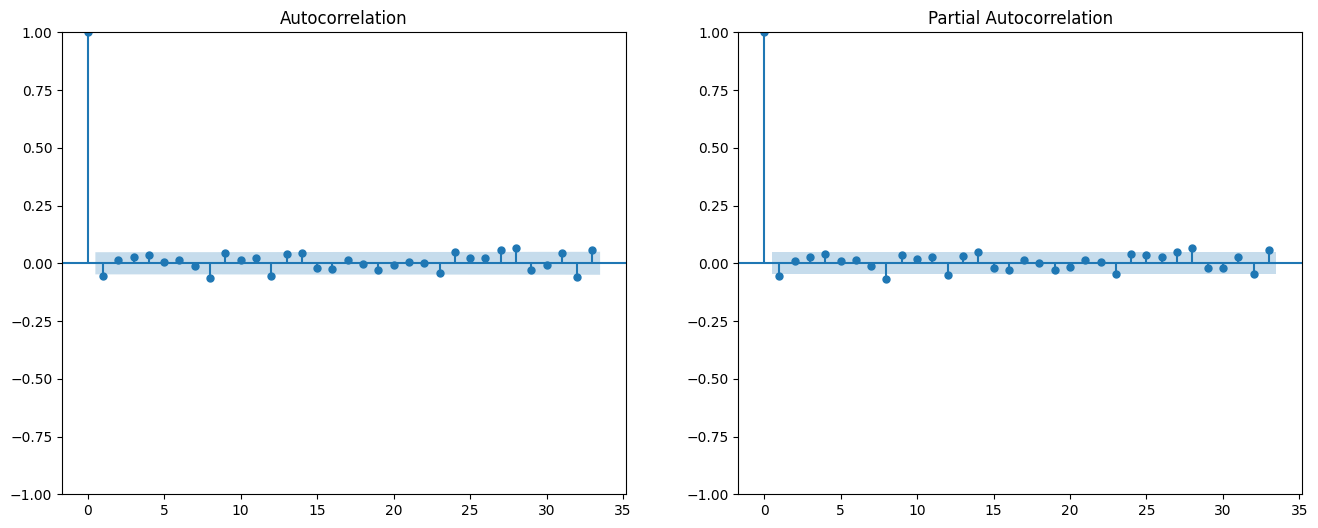

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16,6))
plot_acf(data_diff['BTC-USD'], ax=axes[0])
plot_pacf(data_diff['BTC-USD'], ax=axes[1])
plt.show()

The  ACF and PACF plots suggests that interpreting Bitcoin’s ACF and PACF plots is difficult, potentially pointing to an ARIMA(0, 1, 0) model. This indicates that Bitcoin’s price may follow a “random walk,” meaning each price is dependent on the previous one, and the differenced data could be “white noise,” making predictions unreliable. The author emphasizes that it’s crucial to determine whether the time series is a random walk and find the right model order, which requires checking the stability and distribution of the data over time.

##7-Fitting

###7.1- ARIMA

While I can manually test and fit our own variety of models, an automated function called “Auto — Arima” will automatically fit and test a selection of models and return the model with the lowest AIC value.

In [5]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.0 MB/s eta 0:00:00


In [25]:
import pmdarima as pm
import numpy as np
orig_df = np.log(data['BTC-USD'])

# Fit the ARIMA model using auto_arima with the parameters shown in the image
model = pm.auto_arima(orig_df,
                      start_p=10, start_q=10,  # Starting values for p and q
                      test='adf',  # Use ADF test to find the best value for d
                      max_p=10, max_q=10,  # Maximum values for p and q
                      m=1,  # Non-seasonal model
                      seasonal=False,  # Disable seasonal model
                      d=1,
                      D=0,  # No seasonal differencing
                      trace=True,  # Print results of model fits
                      error_action='ignore',  # Ignore errors during fitting
                      suppress_warnings=True,  # Suppress warnings
                      stepwise=True)  # Use stepwise search to speed up the process

# Print the model summary
print(model.summary())

# Obtain the differenced data and residuals
differenced_data = orig_df.diff(model.order[1]).dropna()  # Differencing based on the model's order[1] (d)
residuals = model.resid()  # Get residuals of the fitted model

Performing stepwise search to minimize aic
 ARIMA(10,1,10)(0,0,0)[0] intercept   : AIC=-6500.795, Time=24.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6498.934, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6502.934, Time=0.65 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6502.433, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6498.478, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6504.101, Time=0.74 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-6502.147, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6502.273, Time=0.61 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6506.169, Time=1.80 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6501.742, Time=0.74 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-6503.629, Time=0.64 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6503.902, Time=2.35 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-6505.517, Time=2.14 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 35.463 seconds
     

In [37]:
from statsmodels.tsa.arima.model import ARIMA
data_diff_log = np.log(data['BTC-USD']).diff().dropna()
model = ARIMA(data_diff_log, order=(1, 1, 1))
model_fit = model.fit()

###7.2- Prediction with ARIMA

Mean Squared Error (MSE): 2294225.112635777
Root Mean Squared Error (RMSE): 1514.6699682227072
Mean Absolute Error (MAE): 1063.6218593248282
R-squared (R2): -9.222532484520762e-05


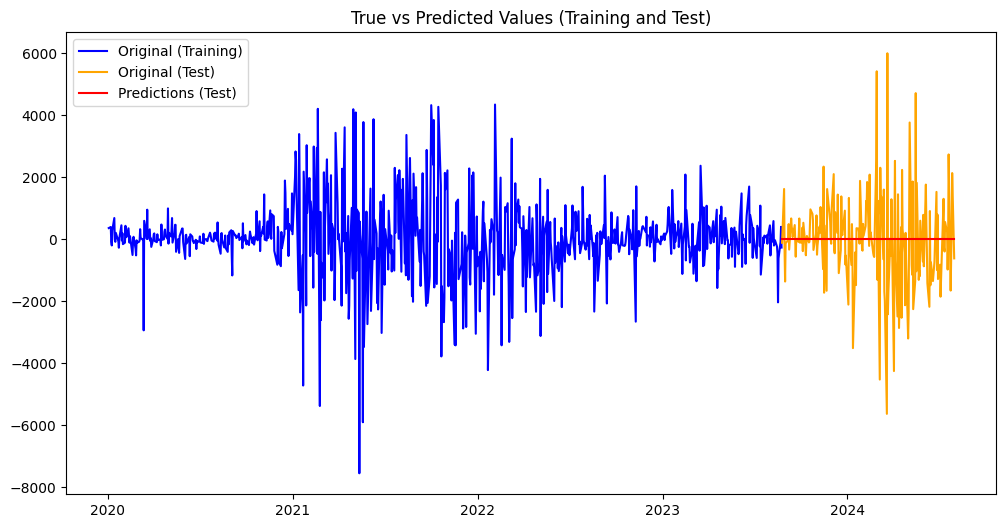

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Divide the data into training set (80%) and test set (20%)
train_size = int(len(data_diff) * 0.8)
train, test = data_diff[:train_size], data_diff[train_size:]

# Refit the model to the training set
model_fit_train = model_fit

# Use the training set model to predict the test set
# Specify the start and end points of prediction
start = len(train)
end = len(train) + len(test) - 1

# Make predictions for the test set
predictions = model_fit_train.predict(start=start, end=end,dynamic=True)
predictions.index = test.index

# Calculate prediction error metrics
mse = mean_squared_error(test['BTC-USD'], predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['BTC-USD'], predictions)
r2 = r2_score(test['BTC-USD'], predictions)

# Print error metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Plot the original data (training + test set) and the predictions
plt.figure(figsize=(12,6))

# Plot the training data (first 80%)
plt.plot(train.index, train['BTC-USD'], label='Original (Training)', color='blue')

# Plot the true values for the test set (last 20%)
plt.plot(test.index, test['BTC-USD'], label='Original (Test)', color='orange')

# Plot the predictions for the test set
plt.plot(test.index, predictions, label='Predictions (Test)', color='red')

plt.title('True vs Predicted Values (Training and Test)')
plt.legend()
plt.show()

**Conclusion:**
R² values ​​close to zero or negative indicate a very poor fit of the model. The R² value reflects the model's ability to explain the data, and if R² is negative, the model's predictions are even worse than a simple mean prediction.

Next, consider using SARIMA (Seasonal Autoregressive Integrated Moving Average Model)

###7.3-SARIMA

Mean Squared Error (MSE): 1517041574.7657464
Root Mean Squared Error (RMSE): 38949.217896714516
Mean Absolute Error (MAE): 38322.33883694385
R-squared (R2): -660.3045407190804


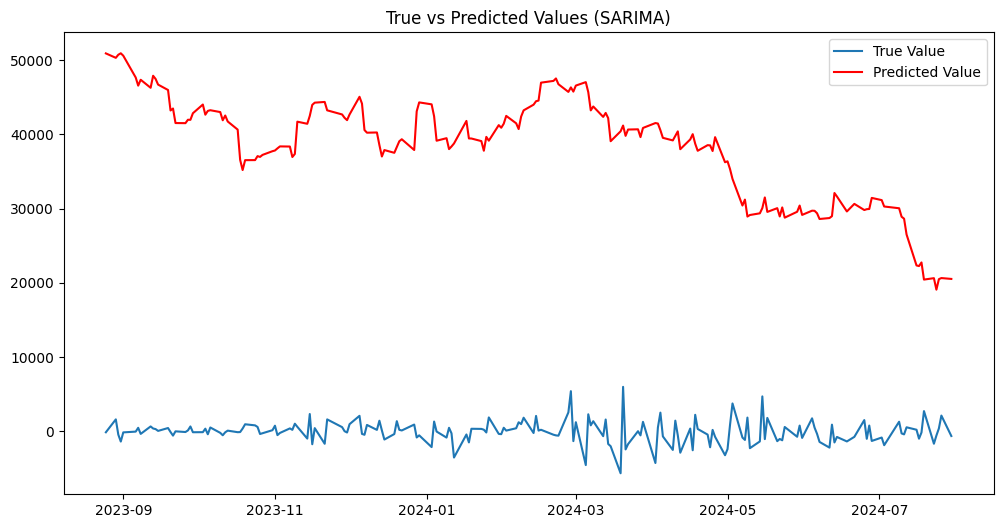

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Fit the SARIMA model
model_sarima = SARIMAX(data['BTC-USD'], order=order, seasonal_order=seasonal_order)
model_fit_sarima = model_sarima.fit(disp=False)
# Predict and plot
start = len(train)
end = len(train) + len(test) - 1
predictions_sarima = model_fit_sarima.predict(start=start, end=end, dynamic=False)

# Calculate prediction errors
mse_sarima = mean_squared_error(test['BTC-USD'], predictions_sarima)
rmse_sarima = np.sqrt(mse_sarima)
mae_sarima = mean_absolute_error(test['BTC-USD'], predictions_sarima)
r2_sarima = r2_score(test['BTC-USD'], predictions_sarima)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse_sarima}")
print(f"Root Mean Squared Error (RMSE): {rmse_sarima}")
print(f"Mean Absolute Error (MAE): {mae_sarima}")
print(f"R-squared (R2): {r2_sarima}")

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(test.index, test['BTC-USD'], label='True Value')
plt.plot(test.index, predictions_sarima, label='Predicted Value', color='red')
plt.title('True vs Predicted Values (SARIMA)')
plt.legend()
plt.show()

**Conclusion:**

1. The extremely negative R-squared value (-660) indicates that the model performs far worse than a simple average baseline model. In other words, the model has very poor predictive performance.
2. RMSE and MAE values are high, showing that the predictions are far from the actual values.

###7.4-ARIMAX - SARIMAX

####7.4-ARIMAX

[*********************100%***********************]  3 of 3 completed
<ipython-input-74-32f5cc9ad8fe>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward-fill NaN values (use backfill or constant if needed)


                                      SARIMAX Results                                       
Dep. Variable:                              BTC-USD   No. Observations:                 1460
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood              -11622.721
Date:                              Sat, 28 Sep 2024   AIC                          23257.442
Time:                                      02:45:15   BIC                          23289.109
Sample:                                  01-02-2020   HQIC                         23269.260
                                       - 12-31-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GC=F           2.5406      0.840      3.025      0.002       0.895       4.187
ETH-USD        9.85

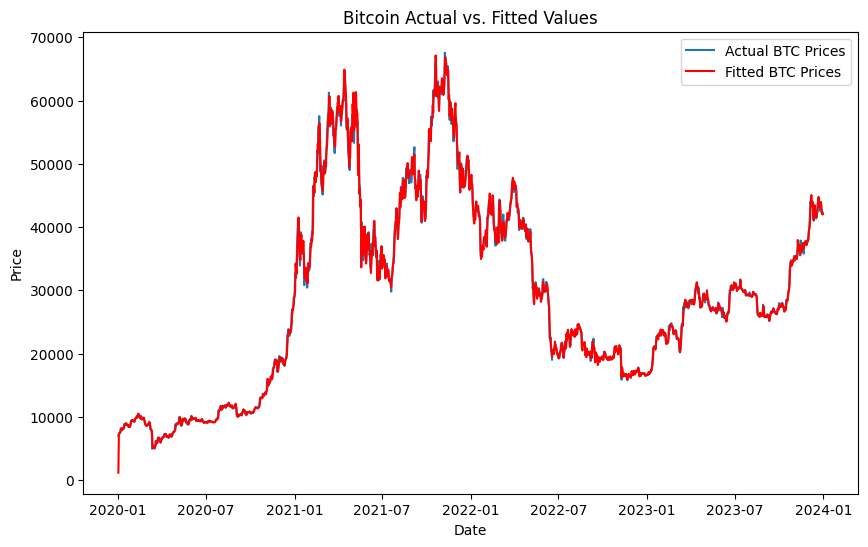

In [74]:
from statsmodels.tsa.arima.model import ARIMA

# Download data from Yahoo Finance for Bitcoin, Gold, and Ethereum
data = yf.download(["BTC-USD", "GC=F", "ETH-USD"], start="2020-01-01", end="2024-01-01")

# Extract the adjusted closing prices for Bitcoin, Gold, and Ethereum
df = data['Adj Close']

# Handle missing or infinite values by forward filling
df = df.replace([np.inf, -np.inf], np.nan)  # Replace inf values with NaN
df.fillna(method='ffill', inplace=True)  # Forward-fill NaN values (use backfill or constant if needed)
df.dropna(inplace=True)  # Drop any remaining missing values

# Synchronize endog and exog datasets in case of any mismatch
min_length = min(len(df['BTC-USD']), len(df[['GC=F', 'ETH-USD']]))
df = df.iloc[:min_length]

model = ARIMA(endog=df['BTC-USD'], exog=df[['GC=F', 'ETH-USD']], order=(1, 1, 1))
model_fit_arima = model.fit()

# Print the model summary
print(model_fit.summary())

# Get the coefficients for the exogenous variables (Gold and Ethereum)
gold_coef = model_fit_arima.params['GC=F']
eth_coef = model_fit_arima.params['ETH-USD']

# Print the exogenous variable coefficients
print(f"Gold Coefficient: {gold_coef:.4f}")
print(f"Ethereum Coefficient: {eth_coef:.4f}")

# Plot the actual Bitcoin prices and fitted values from the SARIMAX model
plt.figure(figsize=(10, 6))
plt.plot(df['BTC-USD'], label='Actual BTC Prices')
plt.plot(model_fit_arima.fittedvalues, label='Fitted BTC Prices', color='red')
plt.title('Bitcoin Actual vs. Fitted Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**Conclusion**:
1. Ethereum has a strong, statistically significant impact on Bitcoin prices, with a coefficient of 9.8574. This suggests that Ethereum is a reliable predictor of Bitcoin prices in model.
2. Gold does not have a statistically significant impact on Bitcoin prices, as its coefficient is very close to zero and the p-value is high (0.965).


[*********************100%***********************]  3 of 3 completed
<ipython-input-79-e15a7f0f946b>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward-fill NaN values (use backfill or constant if needed)


                                      SARIMAX Results                                       
Dep. Variable:                              BTC-USD   No. Observations:                 1460
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood              -11622.721
Date:                              Sat, 28 Sep 2024   AIC                          23257.442
Time:                                      02:49:25   BIC                          23289.109
Sample:                                  01-02-2020   HQIC                         23269.260
                                       - 12-31-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GC=F           2.5406      0.840      3.025      0.002       0.895       4.187
ETH-USD        9.85

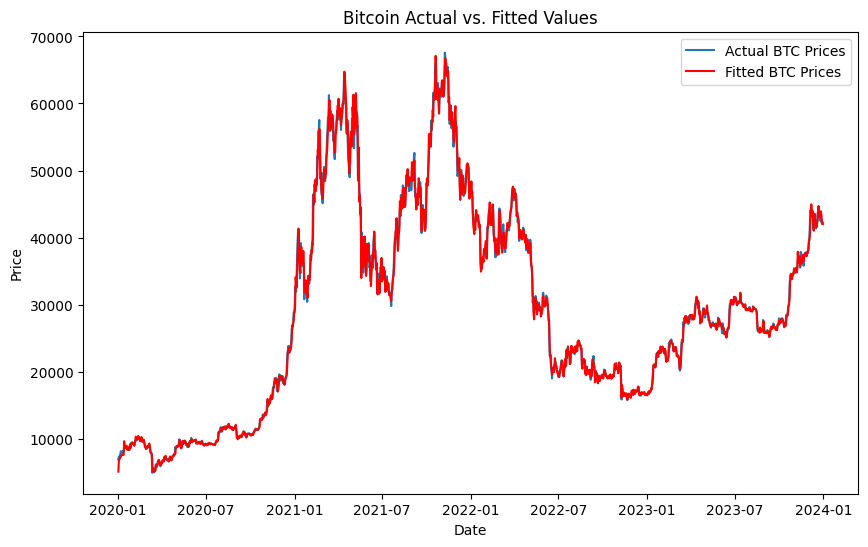

In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Download data from Yahoo Finance for Bitcoin, Gold, and Ethereum
data = yf.download(["BTC-USD", "GC=F", "ETH-USD"], start="2020-01-01", end="2024-01-01")

# Extract the adjusted closing prices for Bitcoin, Gold, and Ethereum
df = data['Adj Close']

# Handle missing or infinite values by forward filling
df = df.replace([np.inf, -np.inf], np.nan)  # Replace inf values with NaN
df.fillna(method='ffill', inplace=True)  # Forward-fill NaN values (use backfill or constant if needed)
df.dropna(inplace=True)  # Drop any remaining missing values

# Synchronize endog and exog datasets in case of any mismatch
min_length = min(len(df['BTC-USD']), len(df[['GC=F', 'ETH-USD']]))
df = df.iloc[:min_length]


model = SARIMAX(endog=df['BTC-USD'], exog=df[['GC=F', 'ETH-USD']],seasonal_order=(1, 1, 1,12))
model_fit_sarimax = model.fit()

# Print the model summary
print(model_fit_sarimax.summary())

# Get the coefficients for the exogenous variables (Gold and Ethereum)
gold_coef = model_fit_sarimax.params['GC=F']
eth_coef = model_fit_sarimax.params['ETH-USD']

# Print the exogenous variable coefficients
print(f"Gold Coefficient: {gold_coef:.4f}")
print(f"Ethereum Coefficient: {eth_coef:.4f}")

# Plot the actual Bitcoin prices and fitted values from the SARIMAX model
plt.figure(figsize=(10, 6))
plt.plot(df['BTC-USD'], label='Actual BTC Prices')
plt.plot(model_fit_sarimax.fittedvalues, label='Fitted BTC Prices', color='red')
plt.title('Bitcoin Actual vs. Fitted Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**Conclusion**:
The SARIMAX model captures some significant relationships between Bitcoin, Gold, and Ethereum, particularly the strong link between Bitcoin and Ethereum.
The Ethereum coefficient is highly significant, and the Gold coefficient is also significant but to a lesser degree.

1. Gold may not have a strong influence on Bitcoin prices,Remove Gold (GC=F)
2. The seasonal AR term is not significant, Remove AR term

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                              BTC-USD   No. Observations:                 1461
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood              -11638.580
Date:                              Sat, 28 Sep 2024   AIC                          23287.161
Time:                                      03:00:30   BIC                          23313.554
Sample:                                  01-01-2020   HQIC                         23297.010
                                       - 12-31-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ETH-USD        9.8854      0.105     94.111      0.000       9.680      10.091
ar.L1          1.00

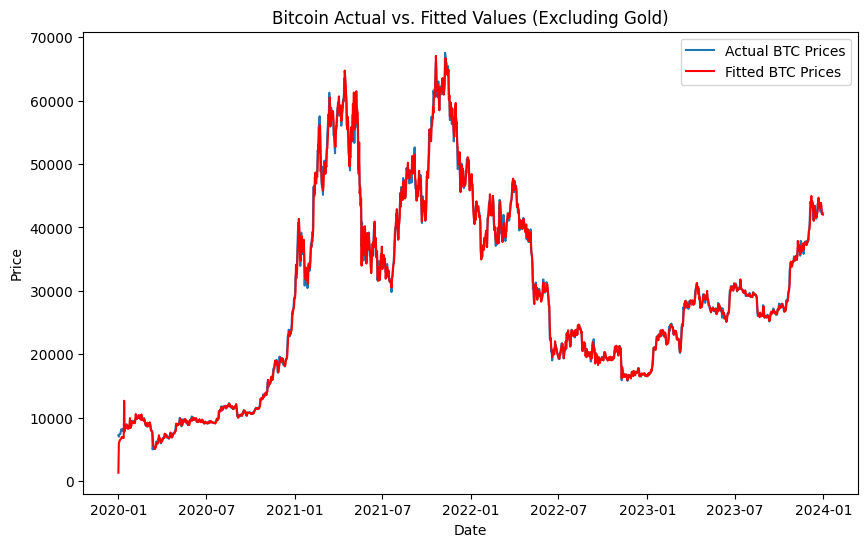

In [86]:
# Create the SARIMAX model with Ethereum as the only exogenous variable (without Gold)
model = SARIMAX(endog=df['BTC-USD'], exog=df[['ETH-USD']], seasonal_order=(1, 1, 1, 12))
model_fit_sarimax = model.fit()

# Print the new model summary
print(model_fit_sarimax.summary())

# Plot the actual Bitcoin prices and fitted values from the updated SARIMAX model
plt.figure(figsize=(10, 6))
plt.plot(df['BTC-USD'], label='Actual BTC Prices')
plt.plot(model_fit_sarimax.fittedvalues, label='Fitted BTC Prices', color='red')
plt.title('Bitcoin Actual vs. Fitted Values (Excluding Gold)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Squared Error (MSE): 182699.6856
Root Mean Squared Error (RMSE): 427.4338
Mean Absolute Error (MAE): 285.8412
R-squared (R2): 0.9931


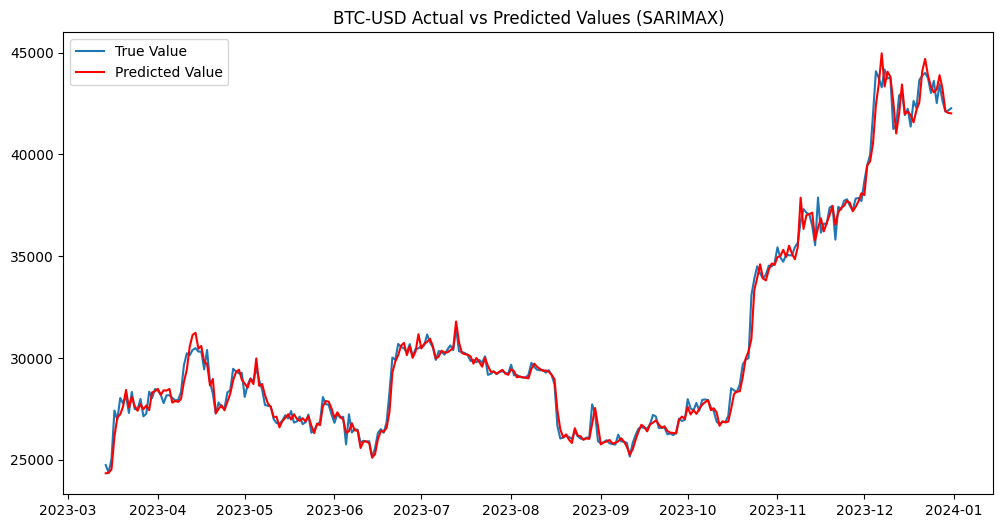

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Get the total number of observations
n_obs = len(df)

# Split the data into train and test sets (80% train, 20% test)
train_size = int(0.8 * n_obs)
train, test = df.iloc[:train_size], df.iloc[train_size:]


# Get predictions for the test set
predictions = model_fit_sarimax.get_prediction(start=test.index[0], end=test.index[-1], exog=test[['ETH-USD']])
predicted_mean = predictions.predicted_mean

# Evaluate the SARIMAX model for Bitcoin
mse_btc = mean_squared_error(test['BTC-USD'], predicted_mean)
rmse_btc = mean_squared_error(test['BTC-USD'], predicted_mean, squared=False)
mae_btc = mean_absolute_error(test['BTC-USD'], predicted_mean)
r2_btc = r2_score(test['BTC-USD'], predicted_mean)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse_btc:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_btc:.4f}")
print(f"Mean Absolute Error (MAE): {mae_btc:.4f}")
print(f"R-squared (R2): {r2_btc:.4f}")

# Plot the actual vs predicted values for Bitcoin
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['BTC-USD'], label='True Value')
plt.plot(test.index, predicted_mean, label='Predicted Value', color='red')
plt.title('BTC-USD Actual vs Predicted Values (SARIMAX)')
plt.legend()
plt.show()


1. The R-squared value of 0.9931 indicates that the model has a very high predictive power, as it explains almost all of the variability in Bitcoin prices.
2. The RMSE and MAE values are relatively low in comparison to typical Bitcoin price fluctuations, suggesting that the model is providing accurate predictions.

End